# Lab 8 Decision Tree and MNIST

Reference: https://www.kaggle.com/code/carlolepelaars/97-on-mnist-with-a-single-decision-tree-t-sne/notebook

## Loading dataset

In [1]:
from keras.datasets import mnist

#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

#printing the shapes of the vectors 
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

2023-03-10 13:20:33.705238: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


## Plot training dataset

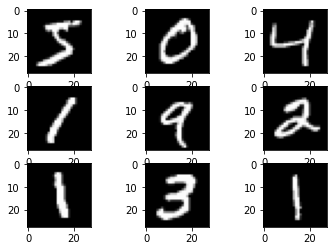

In [2]:
from matplotlib import pyplot
for i in range(9):  
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(train_X[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()

## Training the Decision Tree model
### Baseline: Using all pixel features
#### Train

In [3]:
from sklearn.tree import DecisionTreeClassifier
import random as rn
import numpy as np 

model = DecisionTreeClassifier()

In [4]:
nsamples, nx, ny = train_X.shape
train_X_1 = train_X.reshape((nsamples,nx*ny))
samples, x, y = test_X.shape
test_X_1 = test_X.reshape((samples,x*y))

In [6]:
model.fit(train_X_1, train_y)

DecisionTreeClassifier()

#### Calculate accuracy of the predictions

In [7]:
train_preds = model.predict(train_X_1)
test_preds = model.predict(test_X_1)

In [8]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(test_y, test_preds))
print(classification_report(test_y, test_preds))

[[ 910    0    9    7    6   12   16    3    9    8]
 [   2 1085   13    5    3    7    7    1   11    1]
 [  14    4  889   35   13   10    8   27   21   11]
 [   8    7   30  855    9   48    6    5   28   14]
 [   4    5    8    6  855   11   15   12   20   46]
 [  12    4    4   42   10  754   20    9   26   11]
 [  16    4   11    5   21   18  854    0   21    8]
 [   4   11   30   14    8    5    0  924    9   23]
 [  10    7   24   38   25   29   13    6  789   33]
 [  14    4   10   17   43   11    5   19   24  862]]
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       980
           1       0.96      0.96      0.96      1135
           2       0.86      0.86      0.86      1032
           3       0.83      0.85      0.84      1010
           4       0.86      0.87      0.87       982
           5       0.83      0.85      0.84       892
           6       0.90      0.89      0.90       958
           7       0.92      0.90   

#### Score for train datasets

In [10]:
model.score(train_X_1, train_y) * 100

100.0

#### Score for test datasets

In [11]:
model.score(test_X_1, test_y) * 100

87.77000000000001

### View sample results

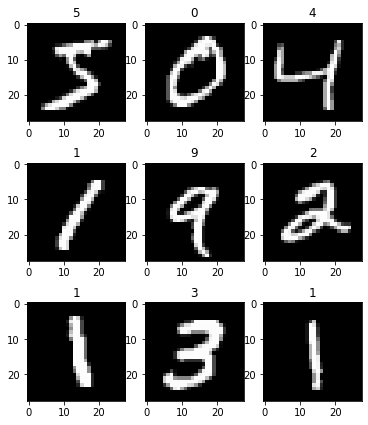

In [12]:
for i in range(9):  
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(train_X[i], cmap=pyplot.get_cmap('gray'))
    pyplot.title(train_preds[i])
pyplot.subplots_adjust(top=1.5)
pyplot.show()

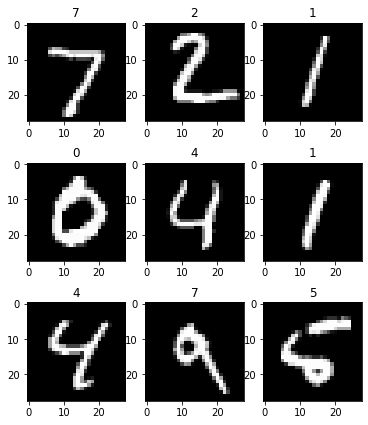

In [13]:
for i in range(9):  
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(test_X[i], cmap=pyplot.get_cmap('gray'))
    pyplot.title(test_preds[i])
pyplot.subplots_adjust(top=1.5)
pyplot.show()

### Visualize decision tree

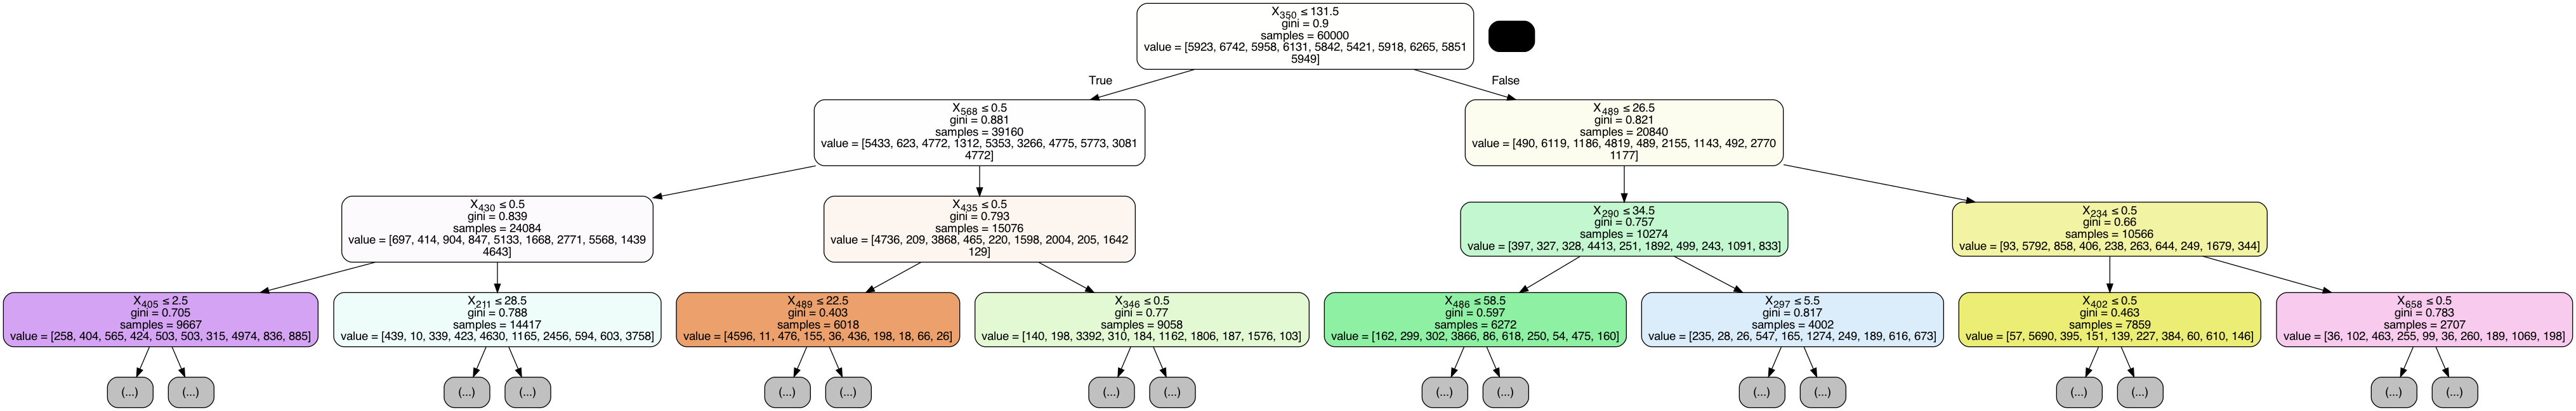

In [14]:
# Convert Decision Tree to visualization
from six import StringIO
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydotplus
from IPython.display import Image 


dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, 
                max_depth=3)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

# Create PNG file
Image(graph.create_png())